In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [4]:
# print(list(df))

In [5]:
output = df['alcohol']

In [6]:
inp = df.drop('alcohol', axis=1)

In [7]:
X = inp.values #converting dataframe to numpy array
y = output.values

In [8]:
print(X)
print(y)

[[7.4   0.7   0.    ... 3.51  0.56  5.   ]
 [7.8   0.88  0.    ... 3.2   0.68  5.   ]
 [7.8   0.76  0.04  ... 3.26  0.65  5.   ]
 ...
 [6.3   0.51  0.13  ... 3.42  0.75  6.   ]
 [5.9   0.645 0.12  ... 3.57  0.71  5.   ]
 [6.    0.31  0.47  ... 3.39  0.66  6.   ]]
[ 9.4  9.8  9.8 ... 11.  10.2 11. ]


In [9]:
X.shape

(1599, 11)

# Question 1a)

In [10]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# to predict
pred_inp = np.zeros(11,)
model.predict([pred_inp])

array([563.17528567])

# Question 1b)

In [17]:
def residual_sum_of_squares(estimator, X, y):
    ans = sum((estimator.predict([X[i]])- y[i])**2 for i in range(len(y)))
    return ans

In [18]:
model = LinearRegression()
scores = cross_val_score(model, X, y,scoring=residual_sum_of_squares, cv = 5)


In [26]:
# All scorer objects follow the convention that higher return values are better than lower return values. 
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.
# print(scores)
print("Average RSS: %f" %(sum(scores)/len(scores)))

Average RSS: 128.714415


# Question 2

In [23]:
inp = []
out = []
for alpha in np.arange(0, 1, 0.05):
    model = Ridge(alpha= alpha)
    inp.append(alpha)
    out.append(np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv = 5))*-1)
        

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


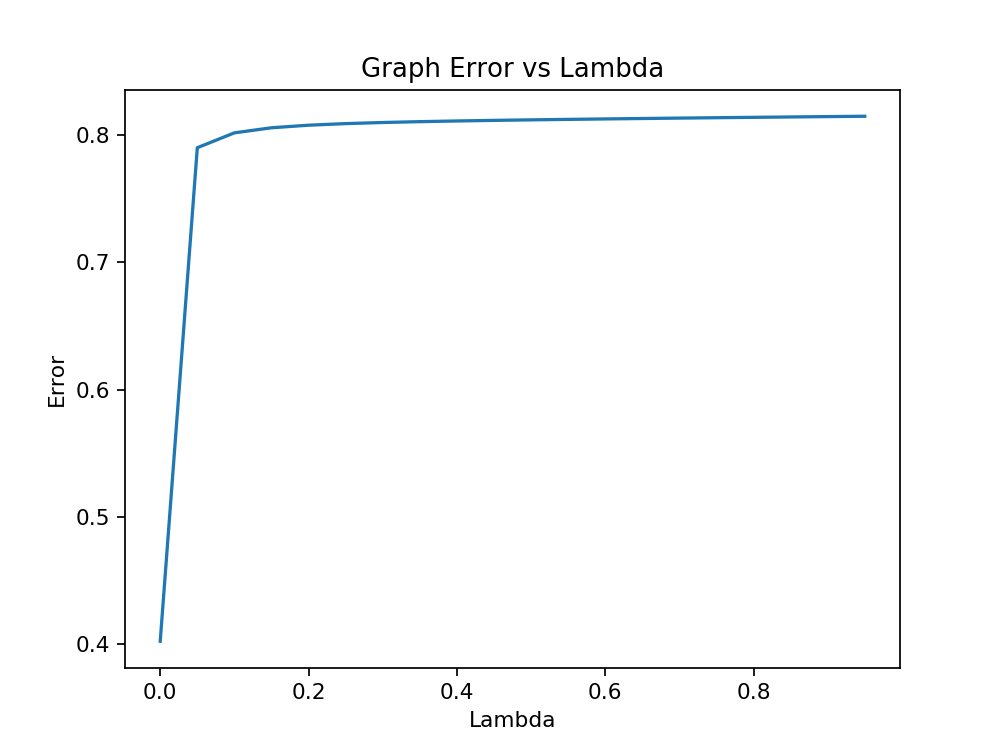

In [29]:
plt.plot(inp, out)
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title("Graph Error vs Lambda")
plt.show()

In [32]:
temp = dict(zip(inp, out))

In [33]:
temp = sorted(temp.items(), key = lambda x: x[1])
print("Value of lambda with least error: %f\nError value: %f" %(temp[0][0], temp[0][1]))

Value of lambda with least error: 0.000000
Error value: 0.402433
